In [ ]:
!pip install segmentation_models_pytorch
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

## Building Baseline U-Net model for sementation

### Loading Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Starting the visualisation

In [ ]:
import numpy as np
index_to_color = {
    0: (0, 255, 255),     # Urban land
    1: (255, 255, 0),     # Agriculture land
    2: (255, 0, 255),     # Rangeland
    3: (0, 255, 0),       # Forest land
    4: (0, 0, 255),       # Water
    5: (255, 255, 255),   # Barren land
    6: (0, 0, 0)          # Unknown
}

def label_mask_to_rgb(mask):
    """Convert a class-index mask (H, W) to RGB mask (H, W, 3) using index_to_color mapping."""
    rgb_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
    for idx, color in index_to_color.items():
        rgb_mask[mask == idx] = color
    return rgb_mask


In [ ]:
import os
import random

base_dir = "/content/drive/MyDrive/"
orig_dir = os.path.join(base_dir, "processed_npy")
aug_dir  = os.path.join(base_dir, "Hackathonn")

In [ ]:
def visualize_npy_sample(image_path, mask_path):
    img = np.load(image_path)
    mask = np.load(mask_path)
    rgb_mask = label_mask_to_rgb(mask)

    fname = os.path.basename(image_path)

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(img)
    axs[0].set_title(f"{fname} - Image")
    axs[0].axis('off')

    axs[1].imshow(rgb_mask)
    axs[1].set_title(f"{fname} - Mask")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()


📦 Showing samples from original (processed_npy)


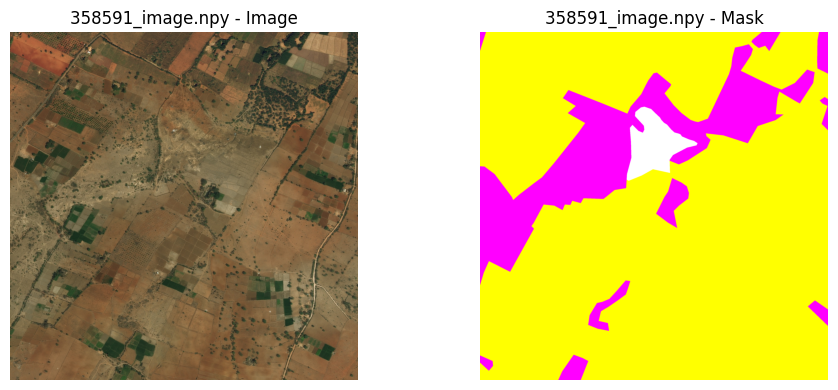

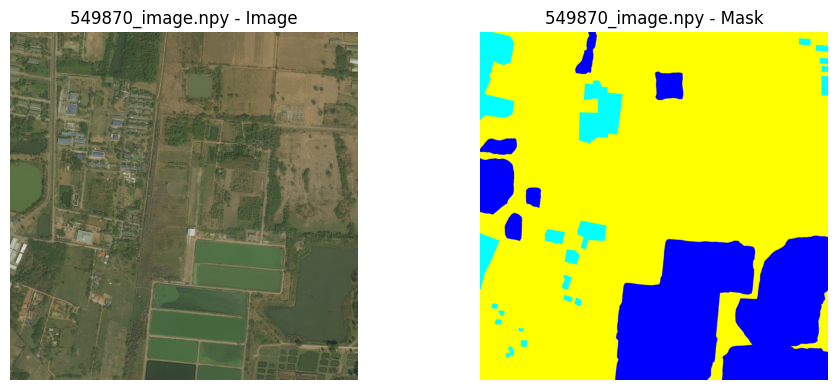

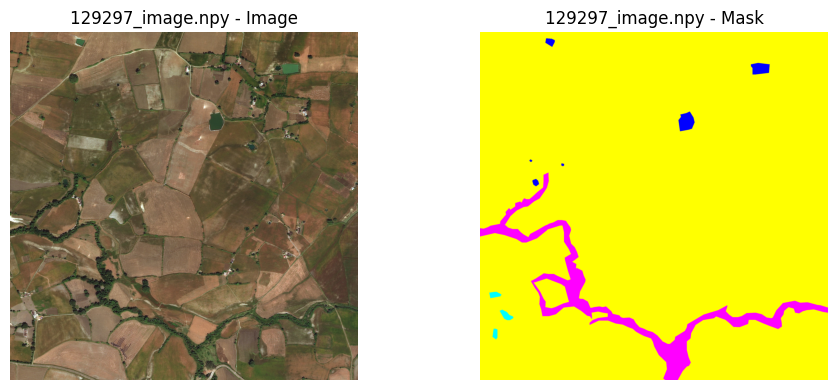

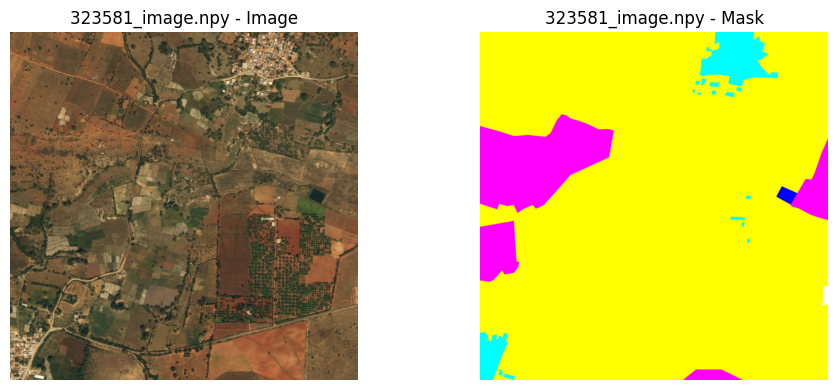

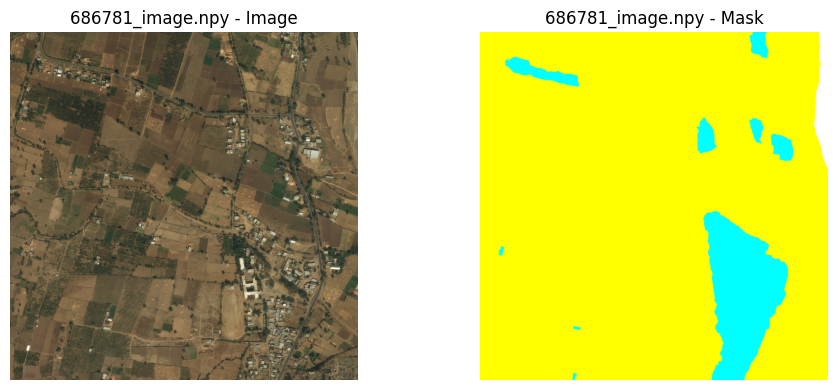

In [ ]:
import matplotlib.pyplot as plt
print(" Showing samples from original (processed_npy)")
orig_bases = sorted([f.replace("_image.npy", "") for f in os.listdir(orig_dir) if f.endswith("_image.npy")])
for base in random.sample(orig_bases, 5):
    image_path = os.path.join(orig_dir, f"{base}_image.npy")
    mask_path  = os.path.join(orig_dir, f"{base}_mask.npy")
    visualize_npy_sample(image_path, mask_path)




✨ Showing samples from augmented (Hackathon)


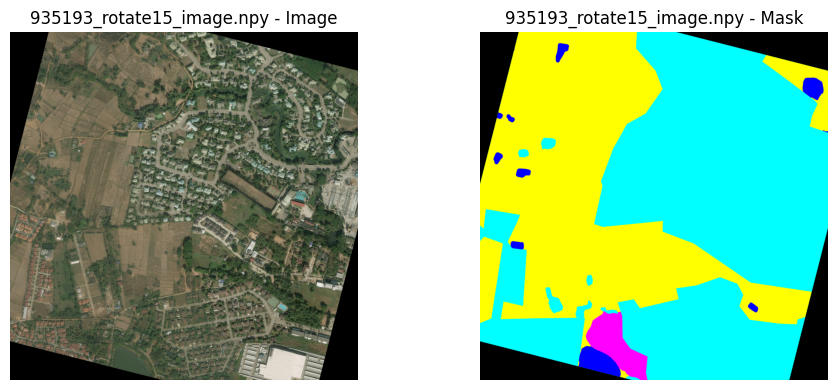

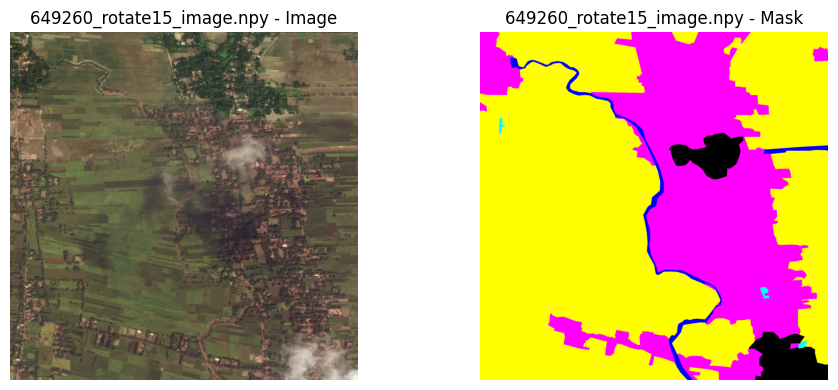

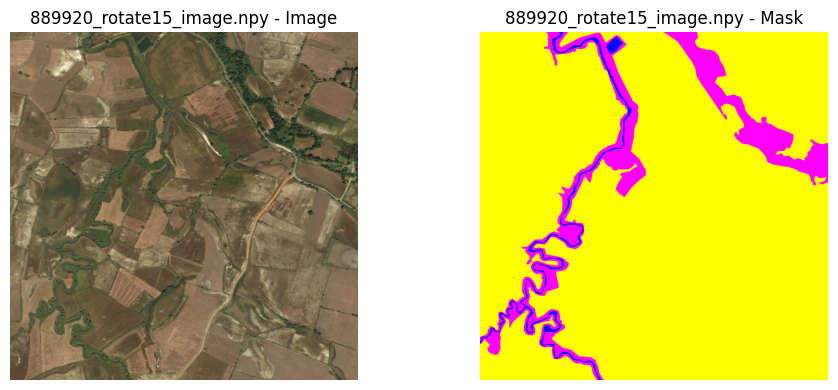

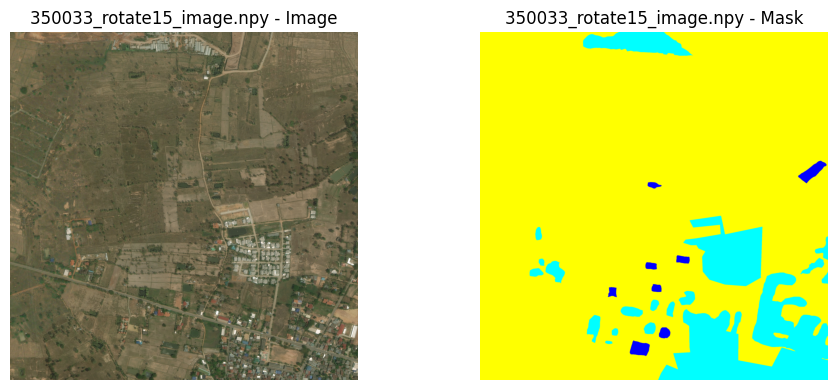

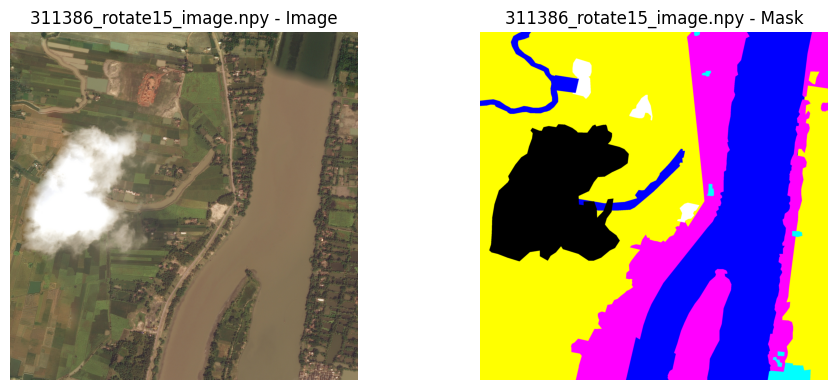

In [ ]:
print("\n✨ Showing samples from augmented (Hackathon)")
aug_bases = sorted([f.replace("_image.npy", "") for f in os.listdir(aug_dir) if f.endswith("_image.npy")])
for base in random.sample(aug_bases, 5):
    image_path = os.path.join(aug_dir, f"{base}_image.npy")
    mask_path  = os.path.join(aug_dir, f"{base}_mask.npy")
    visualize_npy_sample(image_path, mask_path)

In [ ]:
def visualize_npy_sample(image_path, mask_path):
    print(f"\n🔍 Loading image: {image_path}")
    img = np.load(image_path)
    print(f"Image shape: {img.shape}, dtype: {img.dtype}")

    mask = np.load(mask_path)
    print(f"Mask shape: {mask.shape}, dtype: {mask.dtype}")

    rgb_mask = label_mask_to_rgb(mask)

    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Image")
    plt.subplot(1, 2, 2)
    plt.imshow(rgb_mask)
    plt.title("Mask")
    plt.show()


In [ ]:
for base in aug_bases:
    image_path = os.path.join(aug_dir, f"{base}_image.npy")
    try:
        img = np.load(image_path)
        if img.shape != (2448, 2448, 3):
            print(f"⚠️ Unexpected shape {img.shape} in: {image_path}")
    except Exception as e:
        print(f"❌ Failed to load {image_path}: {e}")


We can see from the above visualisations that the data has been properly augmented next we will be creating training and testing datasets

### Creating a custom Pytorch Dataset

In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split, ConcatDataset

# ----------------- Dataset Class ----------------- #
class SegmentationDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None, return_filename=False):
        assert len(image_paths) == len(mask_paths)
        self.image_paths = image_paths
        self.mask_paths  = mask_paths
        self.transform   = transform
        self.return_filename = return_filename

        # Save base filenames for later use
        self.base_names = [os.path.basename(p).replace("_image.npy", "") for p in image_paths]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = np.load(self.image_paths[idx]).astype(np.float32)  # H, W, C
        msk = np.load(self.mask_paths[idx]).astype(np.uint8)     # H, W

        if self.transform:
            img, msk = self.transform(img, msk)

        img_tensor = torch.from_numpy(img).permute(2, 0, 1)       # C, H, W
        msk_tensor = torch.from_numpy(msk).long()                # H, W

        if self.return_filename:
            return img_tensor, msk_tensor, self.base_names[idx]
        else:
            return img_tensor, msk_tensor


# ----------------- Path Setup ----------------- #
pre_dir = "/content/drive/MyDrive/processed_npy"
aug_dir = "/content/drive/MyDrive/Hackathonn"

# ----------------- Step 1: Load Original Dataset ----------------- #
bases = sorted(f.replace("_image.npy", "") for f in os.listdir(pre_dir) if f.endswith("_image.npy"))
orig_imgs = [os.path.join(pre_dir, f"{b}_image.npy") for b in bases]
orig_msks = [os.path.join(pre_dir, f"{b}_mask.npy") for b in bases]

orig_dataset = SegmentationDataset(orig_imgs, orig_msks)

# 85/15 split
n_total = len(orig_dataset)
n_train = int(0.85 * n_total)
n_test  = n_total - n_train

train_orig, test_dataset = random_split(
    orig_dataset,
    [n_train, n_test],
    generator=torch.Generator().manual_seed(42)
)

# ----------------- Step 2: Load All Augmented Files ----------------- #
aug_files = sorted(f for f in os.listdir(aug_dir) if f.endswith("_image.npy"))
aug_bases = [f.replace("_image.npy", "") for f in aug_files]

aug_imgs = [os.path.join(aug_dir, f"{b}_image.npy") for b in aug_bases]
aug_msks = [os.path.join(aug_dir, f"{b}_mask.npy") for b in aug_bases]

aug_dataset = SegmentationDataset(aug_imgs, aug_msks)

# ----------------- Step 3: Combine Original Train + Augmented ----------------- #
train_dataset = ConcatDataset([train_orig, aug_dataset])

# ----------------- Step 4: DataLoaders ----------------- #
batch_size = 1

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, num_workers=4)

print(f"✅ Training samples: {len(train_dataset)}")
print(f"✅ Testing samples : {len(test_dataset)}")


✅ Training samples: 818
✅ Testing samples : 121


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


### Building the model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import segmentation_models_pytorch as smp
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import torchmetrics

n_classes = 7
model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    in_channels=3,
    classes=n_classes
).cuda()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
import torch.optim as optim
from torchmetrics import JaccardIndex, F1Score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device}")

n_classes = 7
epochs = 20
lr = 1e-4

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

train_iou = JaccardIndex(task="multiclass", num_classes=n_classes, average="macro").to(device)
test_iou  = JaccardIndex(task="multiclass", num_classes=n_classes, average="macro").to(device)
train_f1  = F1Score(task="multiclass", num_classes=n_classes, average="macro").to(device)
test_f1   = F1Score(task="multiclass", num_classes=n_classes, average="macro").to(device)
per_class_iou = JaccardIndex(task="multiclass", num_classes=n_classes, average=None).to(device)

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    train_iou.reset(); train_f1.reset()

    for X, y in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [train]"):
        X, y = X.to(device), y.to(device)

        logits = model(X)
        loss = loss_fn(logits, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * X.size(0)
        preds = torch.argmax(logits, dim=1)
        train_iou.update(preds, y)
        train_f1.update(preds, y)

    train_loss /= len(train_loader.dataset)
    mean_iou = train_iou.compute().item()
    f1 = train_f1.compute().item()

    model.eval()
    test_loss = 0.0
    test_iou.reset(); test_f1.reset()

    with torch.inference_mode():
        for X, y in tqdm(test_loader, desc=f"Epoch {epoch+1}/{epochs} [test]"):
            X, y = X.to(device), y.to(device)
            logits = model(X)
            loss = loss_fn(logits, y)

            test_loss += loss.item() * X.size(0)
            preds = torch.argmax(logits, dim=1)
            test_iou.update(preds, y)
            test_f1.update(preds, y)

    test_loss /= len(test_loader.dataset)
    val_iou = test_iou.compute().item()
    val_f1 = test_f1.compute().item()
    class_iou = per_class_iou(preds, y).tolist()

    print(f"\n[Epoch {epoch+1}]")
    print(f"Train Loss: {train_loss:.4f} | Train mIoU: {mean_iou:.4f} | Train F1: {f1:.4f}")
    print(f" Val  Loss: {test_loss:.4f} |  Val  mIoU: {val_iou:.4f} |  Val  F1: {val_f1:.4f}")
    print(f"Class-wise IoU: {class_iou}")

    torch.cuda.empty_cache()


Using cuda


Epoch 1/20 [train]:   0%|          | 0/818 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 1/20 [test]: 100%|██████████| 121/121 [02:42<00:00,  1.35s/it]



[Epoch 1]
Train Loss: 1.3334 | Train mIoU: 0.1206 | Train F1: 0.1696
 Val  Loss: 1.0103 |  Val  mIoU: 0.1850 |  Val  F1: 0.2283
Class-wise IoU: [0.0, 0.7916761040687561, 0.0, 0.0, 0.0, 0.0, 0.0]


Epoch 2/20 [test]: 100%|██████████| 121/121 [02:27<00:00,  1.22s/it]



[Epoch 2]
Train Loss: 1.0750 | Train mIoU: 0.1477 | Train F1: 0.1961
 Val  Loss: 1.0299 |  Val  mIoU: 0.1906 |  Val  F1: 0.2332
Class-wise IoU: [0.0, 0.7883647680282593, 0.0, 0.0, 0.0, 0.0, 0.0]


Epoch 3/20 [test]: 100%|██████████| 121/121 [02:33<00:00,  1.27s/it]



[Epoch 3]
Train Loss: 0.9312 | Train mIoU: 0.1880 | Train F1: 0.2434
 Val  Loss: 1.0079 |  Val  mIoU: 0.1743 |  Val  F1: 0.2229
Class-wise IoU: [0.0, 0.7922199368476868, 0.0, 0.0, 0.0, 0.0, 0.0]


Epoch 4/20 [test]: 100%|██████████| 121/121 [02:32<00:00,  1.26s/it]



[Epoch 4]
Train Loss: 0.8786 | Train mIoU: 0.2480 | Train F1: 0.3214
 Val  Loss: 0.9222 |  Val  mIoU: 0.1625 |  Val  F1: 0.2066
Class-wise IoU: [0.0, 0.7921314239501953, 0.0, 0.0, 0.0, 0.0, 0.0]


Epoch 5/20 [test]: 100%|██████████| 121/121 [02:22<00:00,  1.18s/it]



[Epoch 5]
Train Loss: 0.7838 | Train mIoU: 0.3067 | Train F1: 0.3818
 Val  Loss: 0.8609 |  Val  mIoU: 0.2300 |  Val  F1: 0.2955
Class-wise IoU: [0.0, 0.7920831441879272, 0.0, 0.0, 0.23868070542812347, 0.0, 0.0]


Epoch 6/20 [test]: 100%|██████████| 121/121 [02:25<00:00,  1.21s/it]



[Epoch 6]
Train Loss: 0.7077 | Train mIoU: 0.3707 | Train F1: 0.4684
 Val  Loss: 0.8758 |  Val  mIoU: 0.2435 |  Val  F1: 0.3086
Class-wise IoU: [0.0, 0.7937527894973755, 0.0, 0.0, 0.395791620016098, 0.0, 0.0]


Epoch 7/20 [test]: 100%|██████████| 121/121 [02:22<00:00,  1.18s/it]



[Epoch 7]
Train Loss: 0.6810 | Train mIoU: 0.3999 | Train F1: 0.5038
 Val  Loss: 0.8854 |  Val  mIoU: 0.2625 |  Val  F1: 0.3312
Class-wise IoU: [0.0, 0.7923932075500488, 0.0, 0.0, 0.22465728223323822, 5.475215948536061e-05, 0.0]


Epoch 8/20 [test]: 100%|██████████| 121/121 [02:31<00:00,  1.25s/it]



[Epoch 8]
Train Loss: 0.6156 | Train mIoU: 0.4398 | Train F1: 0.5462
 Val  Loss: 0.8002 |  Val  mIoU: 0.2822 |  Val  F1: 0.3552
Class-wise IoU: [0.0, 0.795617401599884, 0.0, 0.0, 0.4955803453922272, 2.2881462427903898e-05, 0.0]


Epoch 9/20 [test]: 100%|██████████| 121/121 [02:15<00:00,  1.12s/it]



[Epoch 9]
Train Loss: 0.5762 | Train mIoU: 0.4662 | Train F1: 0.5712
 Val  Loss: 0.8707 |  Val  mIoU: 0.2692 |  Val  F1: 0.3385
Class-wise IoU: [0.0, 0.7930749654769897, 0.0, 0.0, 0.14340190589427948, 0.0013074789894744754, 0.0]


Epoch 10/20 [test]: 100%|██████████| 121/121 [02:18<00:00,  1.14s/it]



[Epoch 10]
Train Loss: 0.5690 | Train mIoU: 0.4813 | Train F1: 0.5888
 Val  Loss: 0.8513 |  Val  mIoU: 0.2686 |  Val  F1: 0.3308
Class-wise IoU: [0.0, 0.7926150560379028, 0.0, 0.0, 0.1385686695575714, 0.0, 0.0]


Epoch 11/20 [train]:  87%|████████▋ | 715/818 [17:42<02:28,  1.44s/it]

In [ ]:
"""
This code we are modifying the way IOU is calculated for

import torch.optim as optim
from torchmetrics import JaccardIndex, F1Score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device}")

n_classes = 7
epochs = 20
lr = 1e-4

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

train_iou = JaccardIndex(task="multiclass", num_classes=n_classes, average="macro").to(device)
test_iou  = JaccardIndex(task="multiclass", num_classes=n_classes, average="macro").to(device)
train_f1  = F1Score(task="multiclass", num_classes=n_classes, average="macro").to(device)
test_f1   = F1Score(task="multiclass", num_classes=n_classes, average="macro").to(device)
per_class_iou = JaccardIndex(task="multiclass", num_classes=n_classes, average=None).to(device)

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    train_iou.reset(); train_f1.reset()

    for X, y in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [train]"):
        X, y = X.to(device), y.to(device)

        logits = model(X)
        loss = loss_fn(logits, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * X.size(0)
        preds = torch.argmax(logits, dim=1)
        train_iou.update(preds, y)
        train_f1.update(preds, y)

    train_loss /= len(train_loader.dataset)
    mean_iou = train_iou.compute().item()
    f1 = train_f1.compute().item()

    model.eval()
    test_loss = 0.0
    test_iou.reset(); test_f1.reset(); per_class_iou.reset()

    with torch.inference_mode():
        for X, y in tqdm(test_loader, desc=f"Epoch {epoch+1}/{epochs} [test]"):
            X, y = X.to(device), y.to(device)
            logits = model(X)
            loss = loss_fn(logits, y)

            test_loss += loss.item() * X.size(0)
            preds = torch.argmax(logits, dim=1)
            test_iou.update(preds, y)
            test_f1.update(preds, y)
            per_class_iou.update(preds, y)

    test_loss /= len(test_loader.dataset)
    val_iou = test_iou.compute().item()
    val_f1 = test_f1.compute().item()
    class_iou = per_class_iou.compute().tolist()

    print(f"\n[Epoch {epoch+1}]")
    print(f"Train Loss: {train_loss:.4f} | Train mIoU: {mean_iou:.4f} | Train F1: {f1:.4f}")
    print(f" Val  Loss: {test_loss:.4f} |  Val  mIoU: {val_iou:.4f} |  Val  F1: {val_f1:.4f}")
    print(f"Class-wise IoU: {class_iou}")

    torch.cuda.empty_cache()
"""

### Evaluation on Testing Data

In [ ]:
import matplotlib.pyplot as plt
import torch
from torchmetrics.classification import MulticlassJaccardIndex, MulticlassF1Score, MulticlassAccuracy
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

# Number of classes (adjust if different)
n_classes = 7

# Define metrics
iou_metric = MulticlassJaccardIndex(num_classes=n_classes, average='macro').to(device)
f1_metric = MulticlassF1Score(num_classes=n_classes, average='macro').to(device)
acc_metric = MulticlassAccuracy(num_classes=n_classes, average='macro').to(device)

# Fetch one batch
with torch.no_grad():
    for batch in test_loader:
        imgs, masks = batch
        imgs = imgs.to(device)
        masks = masks.to(device)

        logits = model(imgs)
        preds = torch.argmax(logits, dim=1)

        # Compute metrics
        iou = iou_metric(preds, masks).item()
        f1 = f1_metric(preds, masks).item()
        acc = acc_metric(preds, masks).item()

        print(f"IoU:       {iou:.4f}")
        print(f"F1 Score:  {f1:.4f}")
        print(f"Accuracy:  {acc:.4f}")

        # Visualize first 2 predictions
        imgs = imgs.cpu().permute(0, 2, 3, 1).numpy()  # (B, H, W, C)
        masks = masks.cpu().numpy()
        preds = preds.cpu().numpy()

        for i in range(2):
            fig, axs = plt.subplots(1, 3, figsize=(15, 5))
            axs[0].imshow(imgs[i])
            axs[0].set_title("Satellite Image")
            axs[1].imshow(masks[i], cmap="tab20")
            axs[1].set_title("Ground Truth")
            axs[2].imshow(preds[i], cmap="tab20")
            axs[2].set_title("Predicted Mask")
            for ax in axs:
                ax.axis('off')
            plt.tight_layout()
            plt.show()

        break